# Entrega 3

En esta ultima entrega del miniproyecto utilizaremos el método de segmentación mediante umbralización y realizaremos una experimentación detallada para seleccionar su método de detección final. Para esto haremos un pre-procesamiento a los canales de las imágenes basándose en lo explorado durante la primera entrega del miniproyecto y utilizando transformaciones de intensidades. Una vez tengamos el preprocesamiento implementaremos la umbralización mediante 4 estrategias diferentes. Además usando las combinacines de metodo de umbralización y preprocesamiento que consideren de mejor calidad cualitativamente haremos el procesamiento de la base de datos de validación para así tener una evaluación cualitativa. Por último, realizarán la evaluación de su mejor método en la base de datos de prueba para así obtener el desempeño de nuestra metodología.

## Parte 1: Umbralización
Al igual que en la primera entrega, umbralizaremos nuestras imagenes para obtener mascaras binarias. Sin embargo, el metodo de obtención de los umbrales será lo que varíe. Como bien sabemos existen varios metodos de umbralización, entre los cuales esta Ostu, umbralización por percentiles y umbrales arbitrarios. 

### Parte 1.1: Otsu
Trabajemos primero con la umbralización Otsu para obtener mascaras binarias. Cree una función que entre como parametro una imagen y usted retorne una imagen umbralizada.

**Nota**: Use los operadores > o < para umbralizar la imagen. Recuerde que las celulas segmentadas queden en 1 no en 0. La imagen de entrada de la función debe ser en escala de grises.

In [14]:
import numpy as np
from skimage.filters import threshold_otsu as otsu
import glob 
import matplotlib.pyplot as plt
import os
from skimage import io

#compruebe que la imagen sea BloodImage_00001
bw_img = '' # Variable que contendrá la imagen de un unico canal, use la primera imagen de la base de datos de train y el canal R
# YOUR CODE HERE
list_train = glob.glob(os.path.join(".","data_mp1","BCCD","train","*.jpg")) 
bw_img = io.imread(list_train[0])[:,:,0]

In [15]:
def umbralizacion_otsu(im):
    otsubin_img='' #imagen umbralizada
    # YOUR CODE HERE
    if len(im.shape) == 3:
        im = im[:,:,0]
    umbral_otsu = otsu(im)
    otsubin_img = im < umbral_otsu
    return otsubin_img

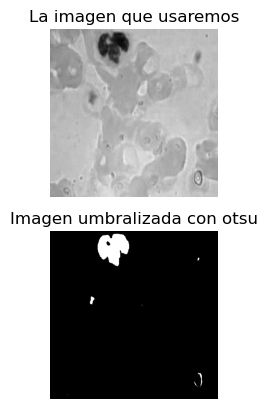

AssertionError: El umbral de otsu es erroneo

In [16]:
assert len(bw_img.shape)==2,f'La imagen tiene mas dimensiones de las esperadas ({len(bw_img.shape)}). Deberían ser 2'
assert bw_img.shape == (416,416) , f'La imagen tiene un tamaño inesperad0 {(bw_img.shape)}. Debería ser (416,416)'
import matplotlib.pyplot as plt

otsubin_img=umbralizacion_otsu(bw_img)

fig,ax=plt.subplots(2)
ax[0].imshow(bw_img,cmap='gray')
ax[0].set_title('La imagen que usaremos')
ax[0].axis('off')
ax[1].imshow(otsubin_img,cmap='gray')
ax[1].set_title('Imagen umbralizada con otsu')
ax[1].axis('off')
plt.show()

assert np.sum(otsubin_img)<416*416/2, 'Usted umbralizó la imagen al reves'
assert np.isclose(np.sum(otsubin_img),73358), 'El umbral de otsu es erroneo'

### Parte 1.2: Percentiles
Otra manera en la que podemos hacer la umbralización es por medio de percentiles. Este tipo de umbralización tiene la ventaja de que mantiene siempre la cantidad de pixeles considerados dentro de la segmentación. Cabe aclarar, el percentil es unicamente el medio por el cual obtenemos el umbral, es decir, es la forma en la que obtendremos cual es nuestro punto de corte para valer las intensidades. Cree una función que entre como parametro una imagen y el percentile a usar, y usted retorne una imagen umbralizada.

**Nota:** Puede usar np.precentile para obtener el umbral.

In [17]:
def umbralizacion_percentile(im,percentile):
    percentilebin_img='' #imagen umbralizada
    # YOUR CODE HERE
    umbral = np.percentile(im,percentile)
    percentilebin_img = im < umbral
    return percentilebin_img

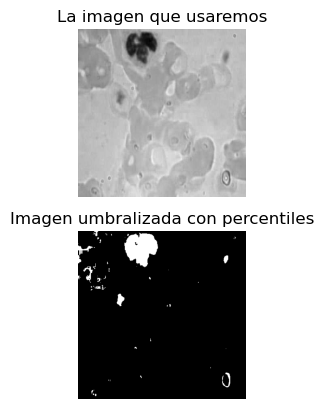

AssertionError: El umbral del percentile es erroneo

In [18]:
percentilebin_img=umbralizacion_percentile(bw_img,4)

fig,ax=plt.subplots(2)
ax[0].imshow(bw_img,cmap='gray')
ax[0].set_title('La imagen que usaremos')
ax[0].axis('off')
ax[1].imshow(percentilebin_img,cmap='gray')
ax[1].set_title('Imagen umbralizada con percentiles')
ax[1].axis('off')
plt.show()

assert np.sum(percentilebin_img)<416*416/2, 'Usted umbralizó la imagen al reves'
assert np.isclose(np.sum(percentilebin_img),6717), 'El umbral del percentile es erroneo'

### Parte 1.3: Umbrales arbitrarios
Por ultimo, los umbrales puede ser seleccionados de forma arbitraria con la información que tenemos disponible. Aqui nos vamos a poder apoyar de gran manera de la información que nos da el histograma de intensidades de la imagen para poder determinar el umbral que vamos a usar, además de la condicion (mayor o menor que). Cree una función que entre como parametro una imagen y el umbral a usar, y usted retorne una imagen umbralizada.

In [19]:
def umbralizacion_arbitrario(im,umbral):
    arbitrarybin_img='' #imagen umbralizada
    # YOUR CODE HERE
    arbitrarybin_img = im < umbral
    return arbitrarybin_img

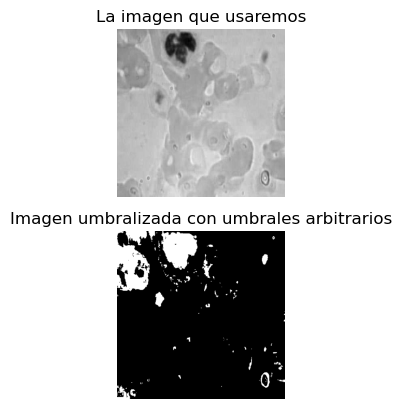

AssertionError: El umbral del percentile es erroneo

In [27]:
arbitrarybin_img=umbralizacion_arbitrario(bw_img,170)

fig,ax=plt.subplots(2)
ax[0].imshow(bw_img,cmap='gray')
ax[0].set_title('La imagen que usaremos')
ax[0].axis('off')
ax[1].imshow(arbitrarybin_img,cmap='gray')
ax[1].set_title('Imagen umbralizada con umbrales arbitrarios')
ax[1].axis('off')
plt.show()

assert np.sum(arbitrarybin_img)<416*416/2, 'Usted umbralizó la imagen al reves'
assert np.isclose(np.sum(arbitrarybin_img),14952), 'El umbral del percentile es erroneo'

## Parte 2: Predicciones
Ahora que tenemos un metodo de umbralización vamos a generar un archivo .json de predicciones. 

### Parte 2.1: Diccionario
Primero, generaremos un diccionario de predicción antes de generar un .json. Cree una función que reciba por parametro una imagen, un image_id, un metodo de segmentación y un dato adicional, y retorne un diccionario con las llaves image_id, category_id ,bbox y score. Use la función implementada en la Entrega 2 de ventana deslizante para obtener una bbox a partir de una imagen umbralizada (use un umbral de 1000 y un tamaño de 104x104) El score será el **porcentaje** de True dentro de la ventana de detección.

In [28]:
def Ventana_deslizante(mask,tamano,umbral):
    'mask (ndarray): Mascara binaria'
    'tamano (tupla): Tamaño en filas,columnas del cuadrante'
    'umbral (int): cantidad de True para determinar positivo'
    # YOUR CODE HERE

    alto, ancho = tamano
    pixeles_maximo = 0
    X, Y, W, H = None, None, None, None
    
    salto = 5
    ventanas_y = ventanas_y = (mask.shape[0] - alto) // salto
    ventanas_x = (mask.shape[1] - ancho) // salto
    
    for i in range(ventanas_y):
        for j in range(ventanas_x):
            ventana = mask[i*salto:i*salto+alto, j*salto:j*salto+ancho]
            pixeles_detectados = np.sum(ventana)
            if (pixeles_detectados > umbral) and (pixeles_detectados > pixeles_maximo):
                pixeles_maximo = pixeles_detectados
                X = j*salto
                Y = i*salto
                W = ancho
                H = alto

    return X,Y,W,H

In [29]:
def diccionario_prediccion(image,image_id,segmentation_method,dato=None):
    'image (ndarray): Imagen de entrada de 1 canal'
    'image_id (int): Identificador de la imagen'
    'segmentation_method (str): Puede ser "otsu", "percentile" o "arbitrario"'
    'dato (int or None): Si se requiere un dato adicional como en la función percentile o arbitrario, este parametró será el umbral o el percentil'
    dict_deteccion={} #diccionario de prediccion
    # YOUR CODE HERE
    
    seg_image = ''
    if segmentation_method == 'otsu':
        seg_image = umbralizacion_otsu(image)
    elif segmentation_method == 'percentile':
        seg_image = umbralizacion_percentile(image, dato)
    elif segmentation_method == 'arbitrario':
        seg_image = umbralizacion_arbitrario(image, dato)
    
    tamanio = (104,104)
    umbral = 1000
    X,Y,W,H = Ventana_deslizante(seg_image, tamanio, umbral)
    x1, y1, x2, y2 = int(X), int(Y), int(X+W), int(Y+H)  
    score = np.sum(seg_image[y1:y2, x1:x2]) / (tamanio[0]*tamanio[1])
    
    dict_deteccion['image_id'] = image_id
    dict_deteccion['category_id'] = 3
    dict_deteccion['bbox'] = (X,Y,W,H)
    dict_deteccion['score'] = score
    
    return dict_deteccion

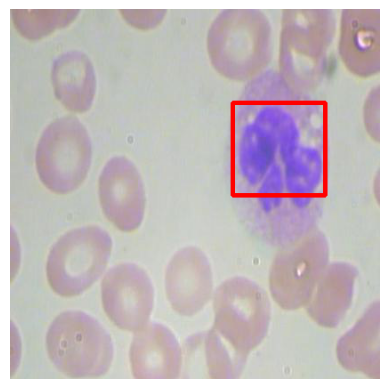

In [30]:
import json
import cv2

with open(os.path.join('data_mp1','BCCD','train','_annotations.coco.json'),'rb') as f:
    anots=json.load(f)

im_name=anots['images'][0]['file_name']
id_image=anots['images'][0]['id']
path=os.path.join('.','data_mp1','BCCD','train',im_name)
image=io.imread(path)
dict_predict=diccionario_prediccion(image[:,:,0],id_image,'otsu')

assert type(dict_predict)==dict, 'El dict_predict deberia ser un diccionario'
assert 'image_id' in dict_predict.keys(), 'El diccionario de detección no tiene la llave "image_id"'
assert 'category_id' in dict_predict.keys(), 'El diccionario de detección no tiene la llave "category_id"'
assert 'bbox' in dict_predict.keys(), 'El diccionario de detección no tiene la llave "bbox"'
assert 'score' in dict_predict.keys(), 'El diccionario de detección no tiene la llave "score"'
assert dict_predict['score'] >=0 and dict_predict['score'] <=1, 'El score debe estar entre 0 y 1'
assert len(dict_predict['bbox'])==4, 'La bbox deberia tener 4 valores'

X,Y,W,H= dict_predict['bbox']
mask=umbralizacion_otsu(image)
assert np.isclose(np.sum(mask[Y:Y+W,X:X+H])/(H*W),dict_predict['score']), 'El score está mal calculado, puede que ester usando las filas como columnas y viseversa'
assert W==104 and H==104, 'El tamaño de la caja es erroneo'
#assert np.isclose(X,115), 'Hay un error en la detección'
#assert np.isclose(Y,250), 'Hay un error en la detección'

plt.imshow(cv2.rectangle(image,(X,Y),(X+W,Y+H),(255,0,0),3))
plt.axis('off')
plt.show()

### Parte 2.2: Prediccion .json
Ahora, debemos recorrer toda nuestra base de datos para generar una predicción completa y utilizar nuestras funciones de metricas implementada en la Entrega 2. Cree una función que reciba por parametro el nombre del fold, el metodo de segmentación, el parametro adicional dato. Esta función debe retornar una lista de diccionarios, use la función implementada en el 2.1 de forma iterativa.

> - Debe recordar que cada imagen tiene su nombre y su image_id, la detección debe corresponderse con su imagen, tenga cuidado de no asignar una deteccion a una imagen que no le corresponde. **Pista:** Solo neceesita usar la llave "images" del .json de la anotacion.
> - El parametro fold indica cual prediccion se va a hacer, lea las anotaciones del correspondiente fold unicamente para obtener el nombre de las imagenes y su correspondiente image_id.

In [31]:
def prediccion_total(fold,segmentation_method,dato=None):
    'fold (str): Puede ser "train", "valid" o "test"'
    'segmentation_method (str): Puede ser "otsu", "percentile" o "arbitrario"'
    'dato (int or None): Si se requiere un dato adicional como en la función percentile o arbitrario, este parametró será el umbral o el percentil'
    list_predict=[] #lista de diccionarios de prediccion
    # YOUR CODE HERE
    
    with open(os.path.join('.','data_mp1','BCCD',fold,'_annotations.coco.json'), 'rb') as f:
        anotaciones=json.load(f)

    for image in anotaciones['images']:
        image_path = glob.glob(os.path.join(".","data_mp1","BCCD",fold,image['file_name']))[0]
        list_predict.append(diccionario_prediccion(io.imread(image_path)[:,:,0], image['id'], segmentation_method, dato))
    
    return list_predict

In [32]:
list_predict=prediccion_total('train','otsu')

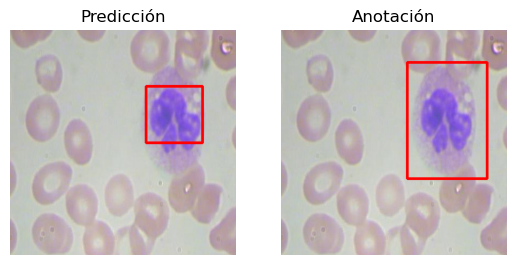

In [33]:
assert type(list_predict) ==list, 'Las detecciones deberian ser una lista de diccionarios'
assert type(list_predict[0])==dict, 'Los elementos de la lista deberian ser diccionarios'
assert len(list_predict)==len(anots['images']), 'Su lista de predicciones debe ser igual a la cantidad de imagenes'

id_image=anots['images'][0]['id']
for i in range(len(list_predict)):
    if list_predict[i]['image_id']==id_image:
        im_name=anots['images'][i]['file_name']
        dict_predict=list_predict[i]

for i in anots['annotations']:
    if i['image_id']==id_image and i['category_id']==3:
        dict_anot=i
path=os.path.join('.','data_mp1','BCCD','train',im_name)
image=io.imread(path)
X,Y,W,H= dict_predict['bbox']

x,y,w,h=dict_anot['bbox']

fig,ax=plt.subplots(1,2)
ax[0].imshow(cv2.rectangle(image,(X,Y),(X+W,Y+H),(255,0,0),3))
ax[0].axis('off')
ax[0].set_title('Predicción')
path=os.path.join('.','data_mp1','BCCD','train',im_name)
image=io.imread(path)
ax[1].imshow(cv2.rectangle(image,(x,y),(int(x+w),int(y+h)),(255,0,0),3))
ax[1].axis('off')
ax[1].set_title('Anotación')
plt.show()

## Parte 3: Metricas
Ya que tenemos una lista de predicciones es momento de calcular la efectividad de nuestro modelo. Continuaremos usando como nuestro baseline la umbralización otsu. Recuerde que las metricas se deben calcular en el fold de validación. Copie las funciones de la Entrega 2 para el calculo de las curvas de precisión y cobertura junto con el mAP y calcule estas metricas para el baseline.

In [34]:
list_val_predict='' #Lista de predicciones para el fold valid usando el baseline
# YOUR CODE HERE
list_val_predict = prediccion_total('valid', 'otsu')

In [35]:
def bounding_box(X,Y,W,H): #modifique esta función, si algun valor es None retorne un arreglo de zeros
    # YOUR CODE HERE
    if X is None or Y is None or W is None or H is None:
        return np.zeros(4)
    A = np.zeros((500, 500))
    x1, y1, x2, y2 = int(X), int(Y), int(X+W), int(Y+H)
    A[y1:y2, x1:x2] = 1
    return A

def evaluacion(anotacion_dict,prediccion_dict,j_umbral,c_umbral):
    metricas='' # arreglo de metricas [TP,FP,FN]
    # YOUR CODE HERE
    metricas = [0,0,0]
    Ax,Ay,Aw,Ah = anotacion_dict['bbox']
    Px,Py,Pw,Ph = prediccion_dict['bbox']
    A = bounding_box(Ax,Ay,Aw,Ah)
    P = bounding_box(Px,Py,Pw,Ph)
    
    # verificar que el score de la prediccion sea mayor al c_umbral
    score = prediccion_dict['score']
    if score < c_umbral:
        metricas[2] += 1  # FN 
    else:
        # verificar que el indice de Jaccard sea superior al umbral
        jaccard_index = jaccard(A, P) 
        if jaccard_index > j_umbral:
            metricas[0] += 1 # TP
        else:
            metricas[1] += 1 # FP
            metricas[2] += 1 # FN

    return metricas    

def jaccard(mask1,mask2):
    # YOUR CODE HERE
    inter = np.sum ( np.logical_and(mask1, mask2) )
    union = np.sum( np.logical_or(mask1, mask2) )
    return inter / union

def Metricas(anotaciones,predicciones,j_umbral,c_umbral):
    # YOUR CODE HERE
    epsilon = 1e-6
    TP, FP, FN = 0,0,0
    # hay una imagen que doble anotacion (39) y una imagen sin anotacion (63) 
    # hay una imagen con doble prediccion (39) y una imagen sin prediccion (63). Todas las predicciones son category 3
    for annotation in anotaciones['annotations']:
        if annotation['category_id'] == 3:
            for prediccion in predicciones:
                if annotation['image_id'] == prediccion['image_id']:
                    metricas = evaluacion(annotation, prediccion, j_umbral, c_umbral)
                    TP += metricas[0]
                    FP += metricas[1]
                    FN += metricas[2]
            
    P = TP / (TP+FP+epsilon)
    C = TP / (TP+FN+epsilon)
    F = 2*P*C / (P+C+epsilon)
    return P,C,F

def Curvas_P_C(anotaciones,predicciones,jaccard):
    # YOUR CODE HERE
    umbrales = np.linspace(0.1, 1, 100)
    Pr, Co, Fm = np.zeros(100), np.zeros(100), np.zeros(100)
    
    for i in range(len(umbrales)):
        P, C, F = Metricas(anotaciones, predicciones, jaccard, umbrales[i])
        Pr[i] = P
        Co[i] = C
        Fm[i] = F
    return Pr,Co,Fm,umbrales

def mAP(precision,cobertura):
    'precisión: Arreglo de precisión'
    'cobertura: Arreglo de cobertura'
    A=0
    for i in range(len(cobertura)-1):
        A+=(cobertura[i]-cobertura[i+1])*precision[i]
    return A

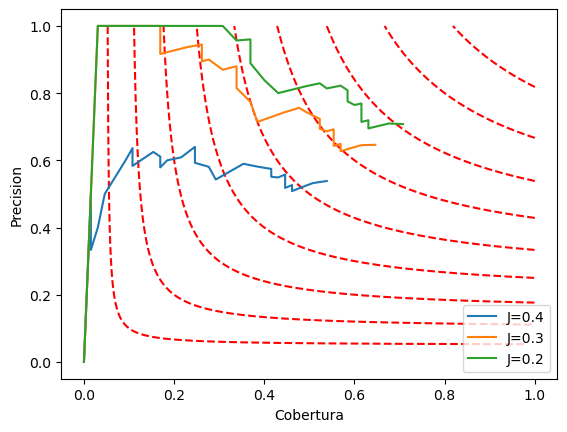

J=0.4, mAP= 0.30900706359690955
J=0.3, mAP= 0.5419387333605789
J=0.2, mAP= 0.632325694001726


In [36]:
with open(os.path.join('data_mp1','BCCD','valid','_annotations.coco.json'),'rb') as f:
    anots=json.load(f)
    
p=np.arange(0.0001,1.0001,0.0001)
for f in np.arange(0.0,1.2,0.1): #saltos de 0.1 desde una F medida de 0 hasta una F medida de 1
    aux=np.zeros(len(p))
    for i in range(len(p)):
        k=(2*p[i]-f)
        if k>0.001:
            c=f*p[i]/k
            aux[i]=c
    c=np.copy(aux)
    c=c*(c<=1)
    l2=np.where(c!=0)[0]
    C=c[l2]
    P=p[l2]
    plt.plot(C,P,'r--')
Pr1,Co1,F1,umbral1=Curvas_P_C(anots,list_val_predict,0.4)
Pr2,Co2,F2,umbral2=Curvas_P_C(anots,list_val_predict,0.3)
Pr3,Co3,F3,umbral3=Curvas_P_C(anots,list_val_predict,0.2)
plt.plot(Co1,Pr1,label='J=0.4')
plt.plot(Co2,Pr2,label='J=0.3')
plt.plot(Co3,Pr3,label='J=0.2')
plt.xlabel('Cobertura')
plt.ylabel('Precision')
plt.legend()
plt.show()

mAP_04=mAP(Pr1,Co1)
mAP_03=mAP(Pr2,Co2)
mAP_02=mAP(Pr3,Co3)

print(f'J=0.4, mAP= {mAP_04}')
print(f'J=0.3, mAP= {mAP_03}')
print(f'J=0.2, mAP= {mAP_02}')

In [37]:
def view_pred(num_im,fold,list_predict):
    with open(os.path.join('data_mp1','BCCD',fold,'_annotations.coco.json'),'rb') as f:
        anots=json.load(f)
    id_image=anots['images'][num_im]['id']
    for i in range(len(list_predict)):
        if list_predict[i]['image_id']==id_image:
            im_name=anots['images'][i]['file_name']
            dict_predict=list_predict[i]

    for i in anots['annotations']:
        if i['image_id']==id_image and i['category_id']==3:
            dict_anot=i
    path=os.path.join('.','data_mp1','BCCD',fold,im_name)
    image=io.imread(path)
    X,Y,W,H= dict_predict['bbox']
    x,y,w,h=dict_anot['bbox']
    anotacion=bounding_box(x,y,w,h)
    prediccion=bounding_box(X,Y,W,H)
    Interseccion=np.sum(anotacion*prediccion)
    Union=np.sum(anotacion)+np.sum(prediccion)-Interseccion
    J=Interseccion/Union
    print(J)
    fig,ax=plt.subplots(1,2)
    ax[0].imshow(cv2.rectangle(image,(X,Y),(X+W,Y+H),(255,0,0),3))
    ax[0].axis('off')
    ax[0].set_title('Predicción')
    path=os.path.join('.','data_mp1','BCCD',fold,im_name)
    image=io.imread(path)
    ax[1].imshow(cv2.rectangle(image,(x,y),(int(x+w),int(y+h)),(255,0,0),3))
    ax[1].axis('off')
    ax[1].set_title('Anotación')
    plt.show()

0.33070384638904177


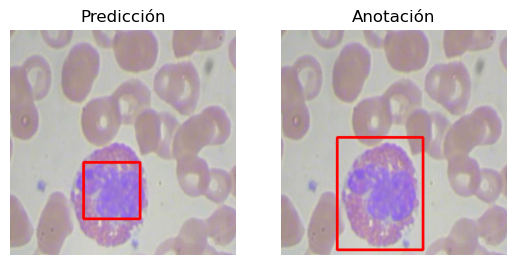

In [38]:
view_pred(1,'valid',list_val_predict)

0.6406698564593302


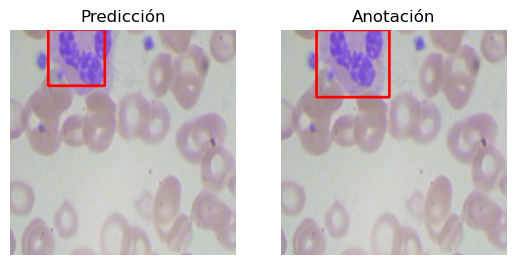

In [39]:
view_pred(4,'valid',list_val_predict)

0.4425531914893617


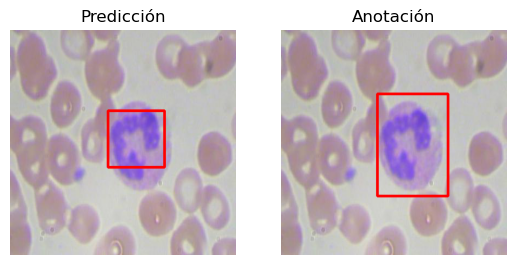

In [40]:
view_pred(31,'valid',list_val_predict)

## Parte 4: Preprocesamiento 

Ahora, haremos un paso importante para la solución de un problema en la visión por computador, el cual es el pre-procesamiento. Aquí harán transformaciones a los diferentes canales para preparar las imágenes para hacer la segmentación de la formas mas fácil y precisa. Inicialmente lo que haremos será importar una imágen cualquiera y la guardaremos en una variable para usarla mas adelante en las pruebas que haremos para cada tipo de preprocesamiento.

In [41]:
bw_img = '' # Variable que contendrá la imagen de un unico canal
# YOUR CODE HERE
bw_img = io.imread(list_train[26])[:,:,0]

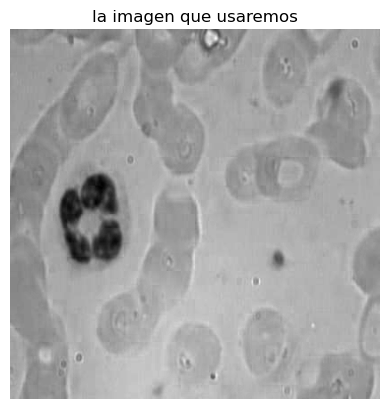

In [42]:
assert len(bw_img.shape)==2,f'La imagen tiene mas dimensiones de las esperadas ({len(bw_img.shape)}). Deberían ser 2'
assert bw_img.shape == (416,416) , f'La imagen tiene un tamaño inesperad0 {(bw_img.shape)}. Debería ser (416,416)'
import matplotlib.pyplot as plt
plt.imshow(bw_img,cmap='gray')
plt.title('la imagen que usaremos')
plt.axis('off')
plt.show()

### 4.1 Transformación gamma
En primer lugar, realizarán un pre-procesamiento utilizando la transformación gamma. Para esto deben
realizar la transformación usando 4 valores de gamma diferentes. Para esto haremos una función que realice la transformación gamma recibiendo tanto la imagen como el gamma con el que realizaremos la tranformación.
> **consejo:** recuerde que la transformación gamma inevitablemente realizará un cambio en el rango de intensidades de la imagen al esta estar entre 0 y 255. Antes de realizar la tranformación cambien el rango de [0,255] a [0,1]

In [43]:
def gamma_trans(image,gamma):
    # YOUR CODE HERE
    image = image / 255
    new_img = image ** gamma
    return new_img

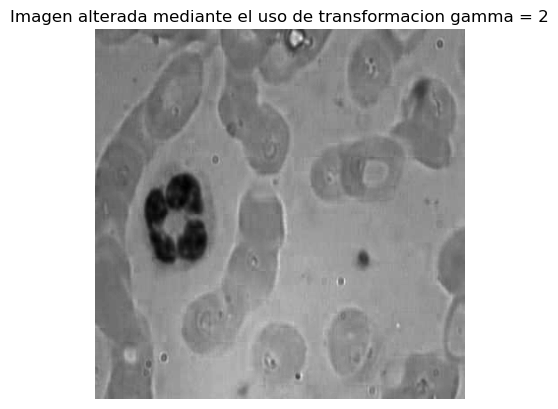

In [44]:
tgamma_img = gamma_trans(bw_img,2)
import numpy as np
assert np.min(tgamma_img)>=0, f'el limite inferior del rango de la imagen es negativo ({np.min(tgamma_img)})'
assert np.max(tgamma_img)<=1, f'el limite inferior del rango de la imagen es mayor a 1 ({np.max(tgamma_img)})'
plt.imshow(tgamma_img,cmap='gray')
plt.title('Imagen alterada mediante el uso de transformacion gamma = 2')
plt.axis('off')
plt.show()

Inicialmente usarán un valor de gamma mayor a 1 y un valor de gamma menor a 1. Esto con el fin de ver visualmente cual de los dos tipos de gamma son los que mas nos conviene segun el canal que hayamos escogido. Para poder observar las diferencias y el rango asi como las intensidades vamos a graficar tanto la imagen en sí como el histograma de las intensidades. Para esto realicen un **unico subplot** que muestre en cada fila la misma imagen con los diferentes gammas, donde en la primera columna cuenten con la imagen transformada y en la segunda el histograma de dicha imagen. 

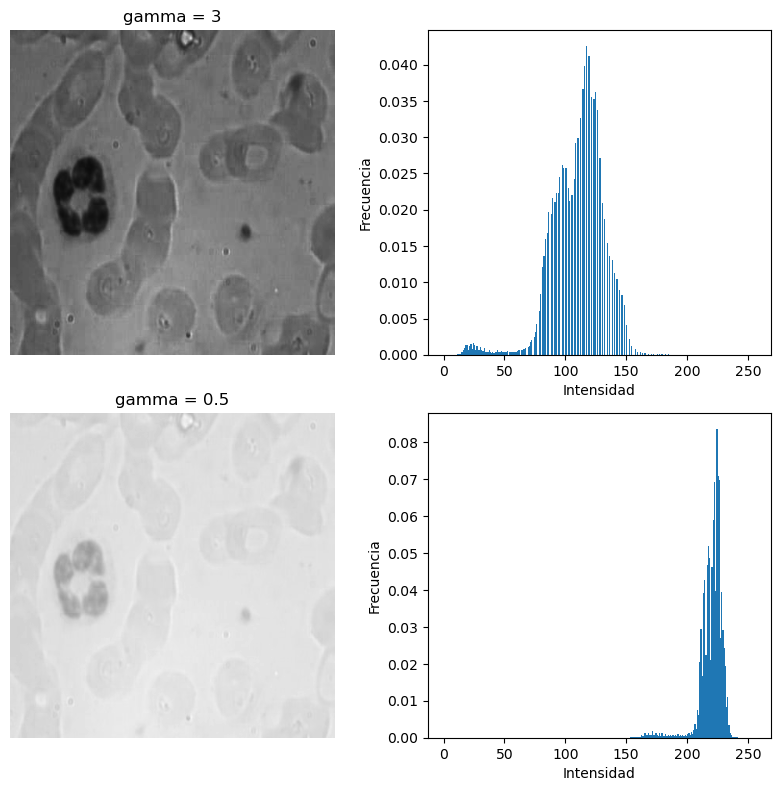

In [45]:
gamma_mayor, gamma_menor = 3, 0.5
trans_mayor = gamma_trans(bw_img, gamma_mayor)
trans_menor = gamma_trans(bw_img, gamma_menor)
images = [trans_mayor, trans_menor]
titles_images = [gamma_mayor, gamma_menor]

plt.figure(figsize=(8, 8))
for i in range(2):
    
    plt.subplot(2,2,2*i+1)
    plt.title(f'gamma = {titles_images[i]}')
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=1)
    plt.axis('Off')
    
    plt.subplot(2,2,2*i+2)
    plt.hist((images[i]*255).astype(np.uint8).flatten(), bins = range(0, 257), density=True)
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    
    plt.tight_layout()
plt.show()

Ahora que ya revisamos cual rango de gammas es el que mas nos conviene para nuestro canal escogido vamos a hacer la busqueda del gamma que mejor tarea haga. Por esto encontraremos 3 gammas mas, ademas del valor que escogimos inicialmente. Para esto realizaremos una figura similar a la que hicimos anteriormente, unicamente con mas filas, por lo que debe tener 4 filas y 2 columnas. Donde la primera columna corresponde a la imagen transformada y la segunda a un histograma. 

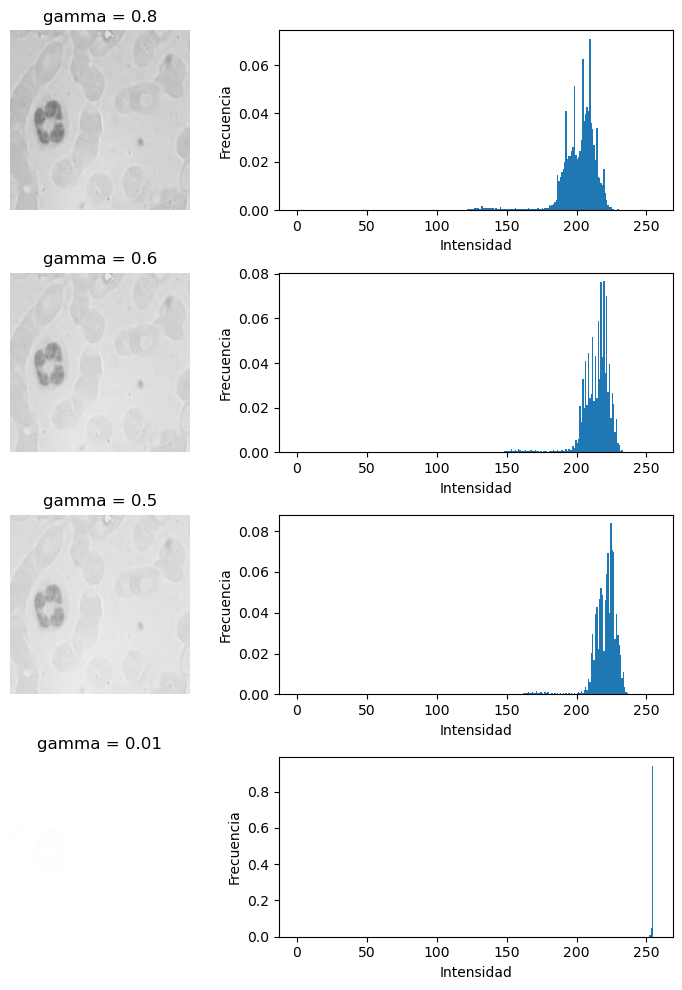

In [46]:
list_gammas = [ 0.8, 0.6, 0.5, 0.01]
images = [gamma_trans(bw_img, gamma) for gamma in list_gammas]
titles_images = [f'gamma = {gamma}' for gamma in list_gammas]

plt.figure(figsize=(8, 10))
for i in range(4):
    plt.subplot(4,2,2*i+1)
    plt.title(titles_images[i])
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=1)
    plt.axis('Off')
    
    plt.subplot(4,2,2*i+2)
    plt.hist((images[i]*255).astype(np.uint8).flatten(), bins = range(0, 257), density=True)
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    
    plt.tight_layout()
plt.show()

### 4.2 Ecualización
Otra en la que podremos realizar una transofrmación de intensidad es por medio de la ecualización. En esta como ya saben buscaremos distribuir las intensidades de forma que nos acerquemos a un histograma constante. Para esto haremos uso de la implementación de scikit image para hacer esta aplicación. Ahora, transformemos la imagen que usamos de ejemplo para este proposito. Use 256 bins.
https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist

In [47]:
from skimage import exposure

tequ_img = '' # Variable que contendrá la imagen alterada usando la ecualización
# YOUR CODE HERE
def ecualizar(img):
    # la imagen que recibe esta entre 0 y 255
    return exposure.equalize_hist(img, nbins=256)
tequ_img = ecualizar(bw_img)

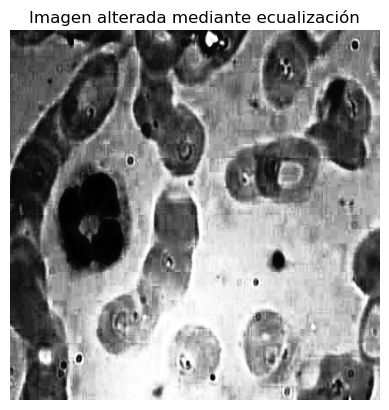

In [48]:
assert np.min(tequ_img)>=0, f'el limite inferior del rango de la imagen es negativo ({np.min(tequ_img)})'
assert np.max(tequ_img)<=1, f'el limite inferior del rango de la imagen es mayor a 1 ({np.max(tequ_img)})'
plt.imshow(tequ_img,cmap='gray')
plt.title('Imagen alterada mediante ecualización')
plt.axis('off')
plt.show()

### 4.3 Especificación
La ultima manera en la que podemos realizar el preprocesamiento es por medio de especificación. Aqui lo mas importante va a ser la escogencia de una imagen objetivo que consideremos nos sirva. Esta imagen deben descargarla de internet, es decir, no deben tenerla en sus archivos locales pues no será descargada al momento de verificar. En la siguiente celda alteren la imagen que tenemos para coincidir con el histograma especificado.
https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.match_histograms

In [49]:
tesp_img = '' # Variable que contendrá la imagen alterada usando la ecualización1
# YOUR CODE HERE
def especificar(img, obj_img=None):
    # las imagenes que recibe esta entre 0 y 255
    
    if obj_img is None:
        url = 'https://scontent.fbog3-1.fna.fbcdn.net/v/t39.30808-6/376552431_1413448165878441_8885306937927266679_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=49d041&_nc_ohc=uSM1gvPgphgAX_ufkGt&_nc_ht=scontent.fbog3-1.fna&oh=00_AfACb50aJ6a7d-8xhGwYKKBs2itDVYdlW_ZCEtZ1vVYoDg&oe=6500CE23'
        obj_img = io.imread(url)[:,:,0]
        
    img = img / 255
    obj_img = obj_img / 255
    return exposure.match_histograms(img, obj_img)

tesp_img = especificar(bw_img)

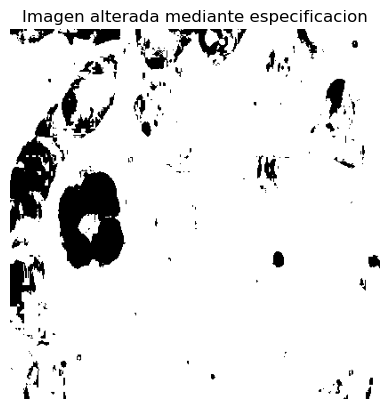

In [50]:
assert np.min(tesp_img)>=0, f'el limite inferior del rango de la imagen es negativo ({np.min(tesp_img)})'
assert np.max(tesp_img)<=1, f'el limite inferior del rango de la imagen es mayor a 1 ({np.max(tesp_img)})'
plt.imshow(tesp_img,cmap='gray')
plt.title('Imagen alterada mediante especificacion')
plt.axis('off')
plt.show()

### 4.4: Preprocesamiento en base de datos

Ahora que sabemos como hacer el preprocesamiento, agregaremos esta posibilidad en nuestra función de prediccion_total. Agregue a su función un parametro de preproc para realizar el preprocesamiento a todas las imagenes de entrada.

In [51]:
from skimage.exposure import equalize_hist
import requests
from skimage.exposure import match_histograms

def prediccion_total(fold,segmentation_method,preproc=None,gamma=None,image_objetivo=None,dato=None):
    'fold (str): Puede ser "train", "valid" o "test"'
    'segmentation_method (str): Puede ser "otsu", "percentile" o "arbitrario"'
    'preproc (str): puede ser "gamma", "ecualizacion" o "especificacion"'
    'gamma (int): Si preproc es "gamma" este debe ser un int no un None'
    'image_objetivo (ndarray): Si preproc es "especificacion" este debe ser una imagen no un None'
    'dato (int or None): Si se requiere un dato adicional como en la función percentile o arbitrario, este parametró será el umbral o el percentil'
    list_predict=[] #lista de diccionarios de prediccion
    # YOUR CODE HERE
        
    with open(os.path.join('.','data_mp1','BCCD',fold,'_annotations.coco.json'), 'rb') as f:
        anotaciones=json.load(f)
    
    for image in anotaciones['images']:
        image_path = glob.glob(os.path.join(".","data_mp1","BCCD",fold,image['file_name']))[0]
        img = io.imread(image_path)[:,:,0]
        
        # se agrega el preproc
        if preproc is not None:
            img_preproc = '' # Imagen preprocesada
            if preproc == 'gamma':
                img_preproc = gamma_trans(img, gamma)
            elif preproc == 'ecualizacion':
                img_preproc = ecualizar(img)
            elif preproc == 'especificacion':
                img_preproc = especificar(img, image_objetivo)
            img = img_preproc*255

        list_predict.append(diccionario_prediccion(img, image['id'], segmentation_method, dato))
    
    return list_predict

## Parte 5: Experimentos
Por ultimo, debemos experimentar un poco con nuestros parametros para lograr obtener el mejor modelo posible. Algunos parametros funcionan bien individualmente y otros en combinación. Realice la experimentación que usted considere pertinente para obtener el mejor modelo. Experimente con el preprocesamiento y los metodos de umbralización principalmente. En su informe debe adjuntar una tabla con los resultados de su experimentación, especificando cual es su baseline y poniendo en negrilla su mejor resultado. Realice al menos 9 experimentos.

> - Puede realizar todos los calculos y graficas necesarias en el conjunto de train, pero las metricas se obtienen en el conjunto de valid.

A continuación, graficamos los resultados de diez experimentos realizados variando el método de umbralización y el preprocesamiento.
Tener en cuenta que la gráfica demora más de cuatro minutos en cargar.


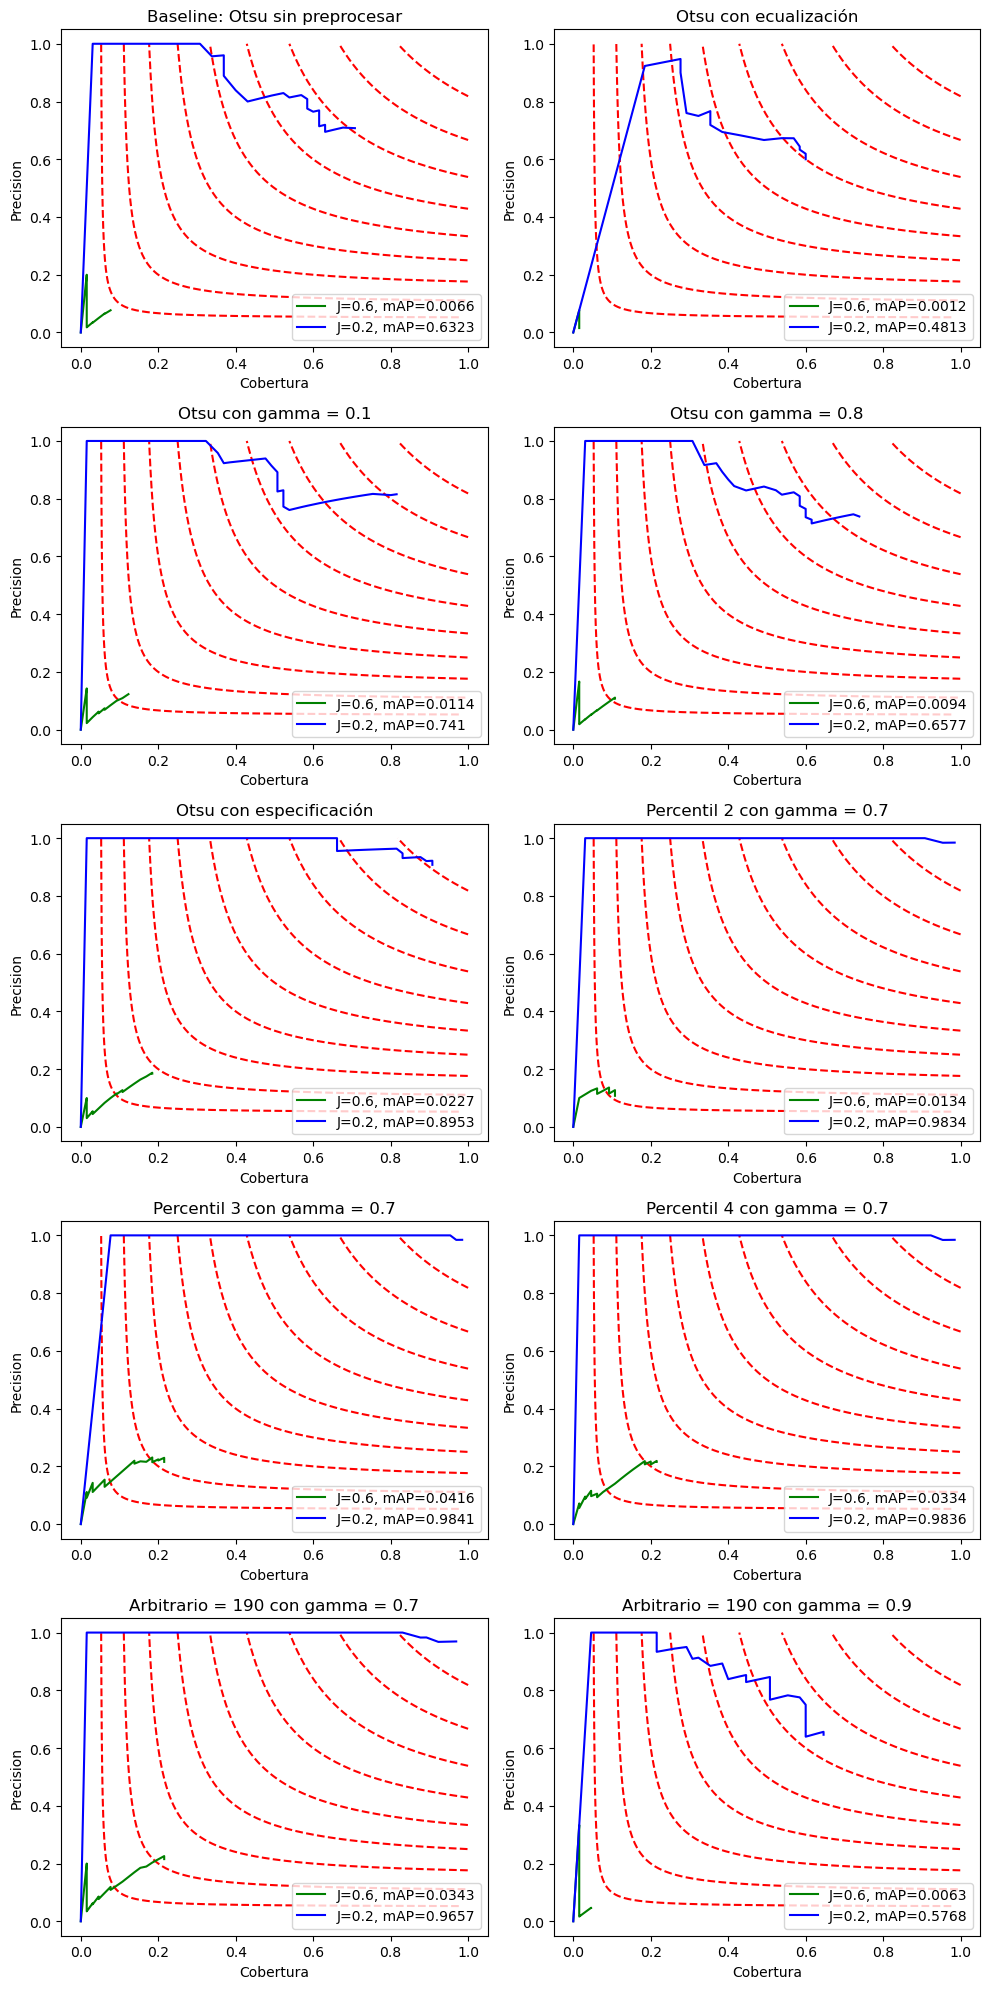

Encontramos que el mejor modelo corresponde al de percentil 3 con gamma = 0.7, puesto que obtuvo el mejor mAP para los dos umbrales de Jaccard evaluados


In [32]:
# Usen esta celda para imprimir y graficar lo que consideren necesario

def graficar_curvas(anots, list_val_predict):
    
    p=np.arange(0.0001,1.0001,0.0001)
    for f in np.arange(0.0,1.2,0.1): #saltos de 0.1 desde una F medida de 0 hasta una F medida de 1
        aux=np.zeros(len(p))
        for i in range(len(p)):
            k=(2*p[i]-f)
            if k>0.001:
                c=f*p[i]/k
                aux[i]=c
        c=np.copy(aux)
        c=c*(c<=1)
        l2=np.where(c!=0)[0]
        C=c[l2]
        P=p[l2]
        plt.plot(C,P,'r--')
        
    Pr1,Co1,F1,umbral1=Curvas_P_C(anots,list_val_predict,0.6)
    Pr2,Co2,F2,umbral2=Curvas_P_C(anots,list_val_predict,0.2)
    mAP_06=round(mAP(Pr1,Co1),4)
    mAP_02=round(mAP(Pr2,Co2),4)
    
    plt.plot(Co1,Pr1,label=f'J=0.6, mAP={mAP_06}', color = 'g')
    plt.plot(Co2,Pr2,label=f'J=0.2, mAP={mAP_02}', color = 'b')
    plt.xlabel('Cobertura')
    plt.ylabel('Precision')
    plt.legend()

    
with open(os.path.join('data_mp1','BCCD','valid','_annotations.coco.json'),'rb') as f:
    anotaciones = json.load(f)


print('A continuación, graficamos los resultados de diez experimentos realizados variando el método de umbralización'
      ' y el preprocesamiento.')
print('Tener en cuenta que la gráfica demora más de cuatro minutos en cargar.')
    
plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.5)  # Ajustar el espacio vertical entre las filas

# Baseline: otsu sin preproc (Parte 3)
list_valid_predict1 = prediccion_total('valid', 'otsu')
plt.subplot(5, 2, 1)
plt.title('Baseline: Otsu sin preprocesar')
graficar_curvas(anotaciones, list_valid_predict1)

# Experimento 1: otsu con ecualizar
list_valid_predict2 = prediccion_total('valid', 'otsu', preproc='ecualizacion')
plt.subplot(5, 2, 2)
plt.title('Otsu con ecualización')
graficar_curvas(anotaciones, list_valid_predict2)

# Experimento 2: otsu con gamma = 0.1
list_valid_predict3 = prediccion_total('valid', 'otsu', preproc='gamma', gamma=0.1)
plt.subplot(5, 2, 3)
plt.title('Otsu con gamma = 0.1')
graficar_curvas(anotaciones, list_valid_predict3)

# Experimento 3: otsu con gamma = 0.8
list_valid_predict4 = prediccion_total('valid', 'otsu', preproc='gamma', gamma=0.8)
plt.subplot(5, 2, 4)
plt.title('Otsu con gamma = 0.8')
graficar_curvas(anotaciones, list_valid_predict4)

# Experimento 4: otsu con especificacion
list_valid_predict5 = prediccion_total('valid', 'otsu', preproc='especificacion')
plt.subplot(5, 2, 5)
plt.title('Otsu con especificación')
graficar_curvas(anotaciones, list_valid_predict5)

# Experimento 5: percentil 2 con gamma = 0.7
list_valid_predict6 = prediccion_total('valid', 'percentile', preproc='gamma', gamma=0.7, dato=2)
plt.subplot(5, 2, 6)
plt.title('Percentil 2 con gamma = 0.7')
graficar_curvas(anotaciones, list_valid_predict6)

# Experimento 6: percentil 3 con gamma = 0.7
list_valid_predict7 = prediccion_total('valid', 'percentile', preproc='gamma', gamma=0.7, dato=3)
plt.subplot(5, 2, 7)
plt.title('Percentil 3 con gamma = 0.7')
graficar_curvas(anotaciones, list_valid_predict7)

# Experimento 7: percentil 4 con gamma = 0.7
list_valid_predict8 = prediccion_total('valid', 'percentile', preproc='gamma', gamma=0.7, dato=4)
plt.subplot(5, 2, 8)
plt.title('Percentil 4 con gamma = 0.7')
graficar_curvas(anotaciones, list_valid_predict8)

# Experimento 8: arbitrario 190 con gamma = 0.7
list_valid_predict9 = prediccion_total('valid', 'arbitrario', preproc='gamma', gamma=0.7, dato=190)
plt.subplot(5, 2, 9)
plt.title('Arbitrario = 190 con gamma = 0.7')
graficar_curvas(anotaciones, list_valid_predict9)

# Experimento 9: arbitrario 190 con gamma = 0.9
list_valid_predict10 = prediccion_total('valid', 'arbitrario', preproc='gamma', gamma=0.9, dato=190)
plt.subplot(5, 2, 10)
plt.title('Arbitrario = 190 con gamma = 0.9')
graficar_curvas(anotaciones, list_valid_predict10)

plt.tight_layout()
plt.show()

print('Encontramos que el mejor modelo corresponde al de percentil 3 con gamma = 0.7, puesto que obtuvo el mejor mAP '
      'para los dos umbrales de Jaccard evaluados.')

## Parte 6: Prueba
Ya hemos determinado cuales parametros son los mejores para nuestro modelo. Ahora, sus predicciones en el conjunto de test para determinar la potencial eficacia de su modelo en la vida real. Adjunte estos resuldatos en su informe. Adicionalmente, adjunte al menos 4 detecciones de su modelo, puede usar la función view_pred que se le dió anteriormente, aprenda a usarla. Se usará un umbral de 0.6 de jaccard para la evaluación.

>- Parte de su calificación será superar el baseline, si no lo logra su codigo tendrá una calificación maxima de 2/2.5, si logra superarlo tendrá una calificación de 3/2.5 (tendrá un bono de 0.5)

El mejor modelo encontrado fue encontrado usando un método de umbralización de percentil 3 y un preprocesamiento de gamma = 0.7
A continuación, graficamos los resultados de este modelo con los datos de test. En la gráfica se muestran el umbral de Jaccard, el mAP y la F-medida máxima:


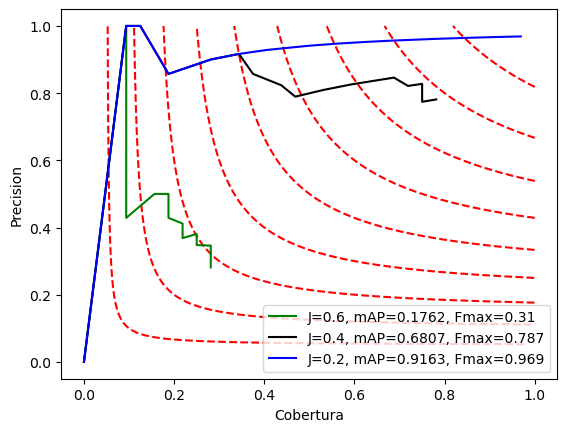



Por último, se muestran cinco predicciones de nuestro modelo y el índice de Jaccard asociado a cada una:

Predicción 0:
Índice de Jaccard:
0.38057705840957073


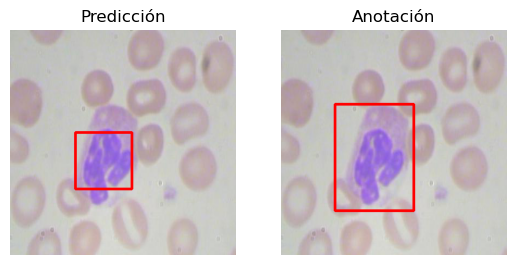

Predicción 1:
Índice de Jaccard:
0.4207905384375973


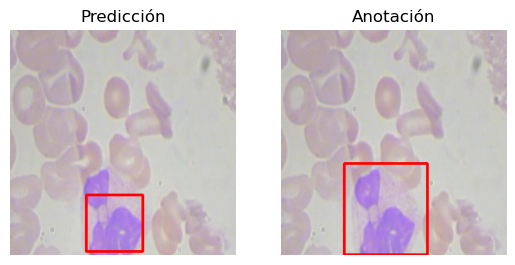

Predicción 2:
Índice de Jaccard:
0.40161895213694254


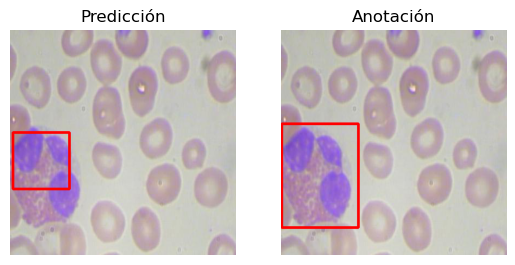

Predicción 3:
Índice de Jaccard:
0.5919763559739478


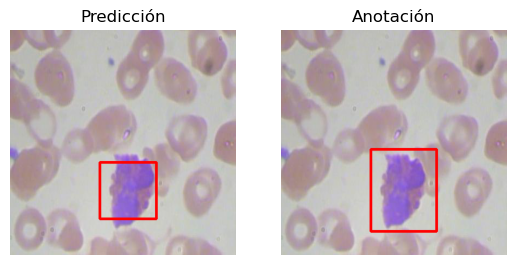

Predicción 4:
Índice de Jaccard:
0.6823480142388497


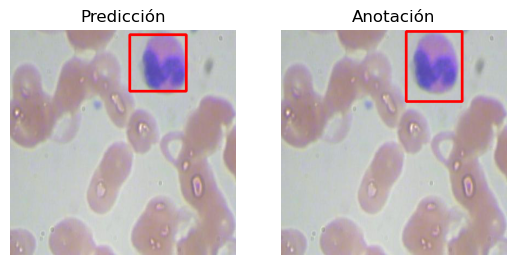

In [33]:
# Usen esta celda para importar funciones necesarias
list_test_predict='' #lista de predicciones de test

# YOUR CODE HERE
def graficar_curvas_1(anots, list_val_predict):
    
    p=np.arange(0.0001,1.0001,0.0001)
    for f in np.arange(0.0,1.2,0.1): #saltos de 0.1 desde una F medida de 0 hasta una F medida de 1
        aux=np.zeros(len(p))
        for i in range(len(p)):
            k=(2*p[i]-f)
            if k>0.001:
                c=f*p[i]/k
                aux[i]=c
        c=np.copy(aux)
        c=c*(c<=1)
        l2=np.where(c!=0)[0]
        C=c[l2]
        P=p[l2]
        plt.plot(C,P,'r--')
        
    Pr1,Co1,F1,umbral1=Curvas_P_C(anots,list_val_predict,0.6)
    Pr2,Co2,F2,umbral2=Curvas_P_C(anots,list_val_predict,0.2)
    Pr3,Co3,F3,umbral3=Curvas_P_C(anots,list_val_predict,0.4)
    mAP_06=round(mAP(Pr1,Co1),4)
    mAP_02=round(mAP(Pr2,Co2),4)
    mAP_04=round(mAP(Pr3,Co3),4)
    F1max = round(np.max(F1),3)
    F2max = round(np.max(F2),3)
    F3max = round(np.max(F3),3)
    
    plt.plot(Co1,Pr1,label=f'J=0.6, mAP={mAP_06}, Fmax={F1max}', color = 'g')
    plt.plot(Co3,Pr3,label=f'J=0.4, mAP={mAP_04}, Fmax={F3max}', color = 'k')
    plt.plot(Co2,Pr2,label=f'J=0.2, mAP={mAP_02}, Fmax={F2max}', color = 'b')
    plt.xlabel('Cobertura')
    plt.ylabel('Precision')
    plt.legend()
    
with open(os.path.join('data_mp1','BCCD','test','_annotations.coco.json'),'rb') as f:
    anotaciones_test = json.load(f)

print(f'El mejor modelo encontrado fue encontrado usando un método de umbralización de percentil 3'
      ' y un preprocesamiento de gamma = 0.7')
print(f'A continuación, graficamos los resultados de este modelo con los datos de test. '
      'En la gráfica se muestran el umbral de Jaccard, el mAP y la F-medida máxima:')
list_test_predict = prediccion_total('test', 'percentile', preproc='gamma', gamma=0.7, dato = 3)
graficar_curvas_1(anotaciones_test, list_test_predict)
plt.show()

print('\n\nPor último, se muestran cinco predicciones de nuestro modelo y el índice de Jaccard asociado a cada una:\n')
for i in range(5):
    print(f'Predicción {i}:')
    print(f'Índice de Jaccard:')
    view_pred(i, 'test', list_test_predict)

In [34]:
with open(os.path.join('data_mp1','BCCD','test','_annotations.coco.json'),'rb') as f:
    anots=json.load(f)
    
Pr1,Co1,F1,umbral1=Curvas_P_C(anots,list_test_predict,0.6)
mAP_04=mAP(Pr1,Co1)

In [35]:
assert mAP_04>0.02288, 'Su metodo no es mejor que el baseline'

# Informe

### Parte 1: Umbralización
- ¿Cuales son las ventajas y desventajas de usar otsu como umbralización?
- ¿Cuales son las ventajas y desventajas de usar percentiles como umbralización?
- ¿Cuales son las ventajas y desventajas de usar umbrales arbitrarios como umbralización?
- ¿Cual metodo le dió mejor resultados y por que?

### Parte 2: Predicciones
- Cree que es valido determinar el score con el porcentaje de area positiva dentro del bbox? ¿que otra idea puede ser valida?
- ¿Que tan sensible es el modelo al score?

### Parte 4: Preprocesamiento
- Muestre los resultados cualitativos de su experimentación con el gamma de la transformación
- Segun las intesidades de los globulos blancos ¿Cual valor de gamma es el indicado? ¿Puede cambiar si se utiliza un canal distinto?
- ¿Tiene sentido realizar ecualización? ¿y especificación? Responda teniendo en cuenta la metodología de segmentación-dteccion que usamos
- ¿Los resultados despues de usar la especificación fueron mejores que la imagen original? ¿que caracteristica tiene la imágen que usaron?

### Parte 3: Procesamiento de la base de datos
- ¿Exactamente cual es el formato de las predicciones?
- ¿Qué información tiene cada una de las predicciones?
- ¿Que particularidad tiene usar el formato json? 

### Parte 5: Experimentación
- adjunte la tabla con los resultados de los experimentos
- ¿Que parametros dio los mejores resultados?
- ¿Que parte del proceso tuvo un mayor impacto? ¿Preprocesamiento o umbralización?
- ¿Por que considera que su mejor metodo dio de esta forma?
- ¿Cree que el preprocesamiento tuvo algun efecto positivo? ¿por qué?
- Ademas de la umbralización y el preprocesamiento ¿cual otro parametro afectará la detección?

### Parte 5: ¡Prueba!
- Incluyan los resultados, incluyendo el subplot, la grafica de la curva PC y el mAP
- ¿Es congruente sus resultados en prueba con los hechos en validación?
- ¿Consideran que tienen una aproximación competente a este problema?
- ¿Que problemas pueden ver en sus resultados cualitativos?
- ¿Como mejorarían su metodo?